In [2]:
from packaging import version
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path
import os
import scipy
from collections import defaultdict
from functools import partial
from  matplotlib.ticker import FuncFormatter
import torch
import numpy as np

In [13]:
def load_exp(exp_name):
    dir_path = Path("/home/xt0r3-user/cambridge/partii/dissertation/s3prl/s3prl/s3prl/result/downstream/")

    with open(dir_path / exp_name / "log.log") as f:
        for line in f:
            pass
        metrics_line = line

    metrics_list = metrics_line.split('|')[1:-1]

    metrics = dict([
     tuple(metric_pair.split(':')) for metric_pair in metrics_list
    ])
    
    return metrics
    # sns.lineplot(dfx, x='step', y='value', hue='name', errorbar=None)

In [14]:
augs = ['no_aug', 'timedomain_specaug', 'phase_perturbation', 'neftune', 'add_noise', 'vltp', 'tempo_perturbation', 'add_reverb', 'specaug']
# metric_list = ['f1_score', 'recall', 'precision', 'loss', 'per']
# splits=['dev', 'test']
# parsed_metrics = []
# for split in splits:
#     for metric in metric_list:
#         parsed_metrics.append(f"{split}_{metric}")

In [60]:
metrics = defaultdict(dict)
for augmentation in augs:
    for i in range(1, 3):
        metrics[augmentation][i]=(load_exp(f"seed_{augmentation}_{i}"))
        # print(f"{i}_{augmentation}")
        # display(dfx.loc['dev_f1_score'].isna().any())
        # print(dfx.loc[metric]['value'])

df = pd.json_normalize(metrics)
df.columns = pd.MultiIndex.from_tuples(df.columns.str.split('.').to_series().apply(tuple))
df = df.stack(1).droplevel(0, axis=0).astype(float)
df

add_noise                                                   \
  corr_diag_pct deletions err_diag_pct  f1_score      fn      fp   
1      0.546536    1253.0     0.291242  0.466050  1585.0  2653.0   
2      0.537744    1353.0     0.295589  0.460306  1624.0  2644.0   

                                                             ...       vltp  \
  global-f1-score global-per global-precision global-recall  ... insertions   
1        0.550393   0.164460         0.494378      0.620723  ...      443.0   
2        0.545086   0.165389         0.491636      0.611576  ...      423.0   

                                                                               \
        loss num_ref_tokens        per precision    recall step substitutions   
1  20.576000        31187.0  17.101168  0.452973  0.567212  0.0        3391.0   
2  20.379051        31187.0  17.627563  0.437617  0.567862  0.0        3433.0   

                    
        tn      tp  
1  24694.0  2664.0  
2  24489.0  2679.0  

[2 rows x 180 columns]

In [61]:
df[('no_aug', 'loss')]

1    25.188023
2    25.485199
Name: (no_aug, loss), dtype: float64

In [62]:
scipy.stats.ttest_ind(np.zeros(10), np.ones(10) + np.random.normal(0, 0.1, 10))

Ttest_indResult(statistic=-30.873069457596888, pvalue=4.8285695635855955e-17)

In [63]:
metric_list = [
    'loss',
    'global-per',
    'global-precision',
    'global-recall',
    'global-f1-score',

]

In [64]:
results = []
small_augs = list(set(augs) - {'no_aug'})
for augmentation in small_augs:
    cur_res = []
    for metric in metric_list:
        # print(metrics[f"{split}_{metric}"]["no_aug"])
        # print(f"{split}_{metric}")
        result = scipy.stats.ttest_ind(
                    df[("no_aug", metric)],
                    df[(augmentation, metric)],
                )
        cur_res.append(result.pvalue)
        cur_res.append(result.statistic)
        # test_result = scipy.stats.ttest_ind(
        #             metrics["test_f1_score"]["no_aug"] , metrics["test_f1_score"][augmentation],
                    
        #         )
    # dev_loss = scipy.stats.ttest_ind(
    #             metrics["dev_loss"]["no_aug"],metrics["dev_loss"][augmentation],
                
    #         )
    # test_loss = scipy.stats.ttest_ind(
    #             metrics["test_loss"]["no_aug"] , metrics["test_loss"][augmentation],
                
    #         )
    # dev_result = scipy.stats.ttest_1samp(
    #             metrics["dev_f1_score"]["no_aug"]-metrics["dev_f1_score"][augmentation],
    #             0
    #         )
    # test_result = scipy.stats.ttest_1samp(
    #             metrics["test_f1_score"]["no_aug"] - metrics["test_f1_score"][augmentation],
    #             0
    #         )
    # dev_loss = scipy.stats.ttest_1samp(
    #             metrics["dev_loss"]["no_aug"]-metrics["dev_loss"][augmentation],
    #             0
    #         )
    # test_loss = scipy.stats.ttest_1samp(
    #             metrics["test_loss"]["no_aug"] - metrics["test_loss"][augmentation],
    #             0
    #         )
    results.append(
        cur_res
    )
        # [
        #     dev_result.pvalue, dev_result.statistic,
        #     dev_loss.pvalue, dev_loss.statistic,
        #     test_result.pvalue, test_result.statistic,
        #     test_loss.pvalue, test_loss.statistic,
        #     ])



In [67]:

pd.DataFrame(results, index=small_augs, columns=pd.MultiIndex.from_product([metric_list, ['pvalue', 'statistic']])).loc(axis=1)[:, 'pvalue'].style.highlight_between(color='green', right=0.05)

,loss,global-per,global-f1-score
,pvalue,pvalue,pvalue
tempo_perturbation,0.001923,0.162982,0.802588
timedomain_specaug,0.004937,0.080470,0.660588
add_noise,0.001014,0.031885,0.269360
neftune,0.210640,0.901023,0.919799
add_reverb,0.710182,0.295093,0.583014
specaug,0.001486,0.240516,0.292264
vltp,0.001343,0.293374,0.564827
phase_perturbation,0.883674,0.292915,0.696436


In [27]:

pd.DataFrame(results, index=small_augs, columns=pd.MultiIndex.from_product([splits, metric_list, ['pvalue', 'statistic']])).loc(axis=1)[:, :, 'statistic'].style.highlight_between(color='green', right=-2)

In [11]:
history['dev_f1_score']

{'no_aug':                  value     value     value     value     value
 name                                                          
 dev_f1_score  0.215067  0.215067  0.215067  0.215067  0.215067
 dev_f1_score  0.332019  0.350584  0.332261  0.354291  0.333627
 dev_f1_score  0.420848  0.422394  0.423157  0.419827  0.403038
 dev_f1_score  0.439772  0.439102  0.441836  0.444779  0.446130
 dev_f1_score  0.449109  0.453909  0.467823  0.463020  0.462648
 dev_f1_score  0.475060  0.473828  0.473355  0.464969  0.470080
 dev_f1_score  0.469087  0.465080  0.476381  0.465071  0.465545
 dev_f1_score  0.475259  0.469748  0.472473  0.477386  0.478762
 dev_f1_score  0.469250  0.469653  0.477214  0.469311  0.477726
 dev_f1_score  0.474970  0.459324  0.466042  0.468981  0.458850
 dev_f1_score  0.469040  0.455154  0.469467  0.460885  0.470943
 dev_f1_score  0.487167  0.474538  0.480460  0.482970  0.472384
 dev_f1_score  0.480514  0.470660  0.486818  0.472433  0.479260
 dev_f1_score  0.473809  0.473

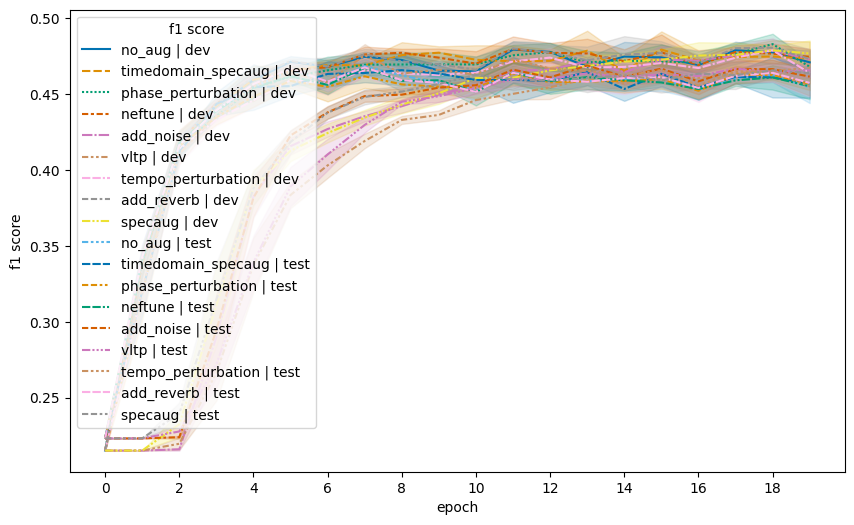

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
histories = [
            history[f"{split}_f1_score"][aug]
            .reset_index(drop=True)
            .rename(columns=lambda col: f"{aug} | {split}")
            .rename_axis(index="epoch", columns='f1 score')
    for split in ['dev', 'test']
    for aug in augs
]

sns.lineplot(
            pd.concat(histories, axis=1),
            errorbar="sd",
            palette='colorblind'
        ).set(ylabel='f1 score',
xticks=list(range(0, 20, 2)))

plt.savefig('f1_scores.png')

# plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

In [13]:
scipy.stats.ttest_ind(
    history['test_f1_score']['phase_perturbation'].iloc[3],
    history['test_f1_score']['phase_perturbation'].iloc[15],
)

Ttest_indResult(statistic=-6.443249188943741, pvalue=0.0001997351606865684)

In [14]:
history['test_f1_score']['phase_perturbation'].iloc[3]

value    0.427270
value    0.435995
value    0.432710
value    0.437449
value    0.441288
Name: test_f1_score, dtype: float64

In [15]:
history['test_f1_score']['phase_perturbation'].iloc[19]

value    0.453385
value    0.456980
value    0.451419
value    0.460759
value    0.461572
Name: test_f1_score, dtype: float64